# 필기체 숫자를 압축하는 오토인코더 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

32 픽셀로 압축

In [ ]:
encoding_dim = 32     #32 픽셀로 압축

함수형 API를 이용한 모델작성

In [ ]:
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

모델 Compile

In [ ]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

MNIST 학습용 Data Set 이용

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

모든 값을 0~1 사이로 정규화하고 28x28 이미지를 크기 784의 1차원 벡터로 만들기

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

AutoEncorder 학습 실행

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Decode된 이미지 생성

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

10개의 이미지 출력

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
  # 원본 데이터
  ax = plt.subplot(2, n, i)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  # 재구성된 데이터
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
plt.show()

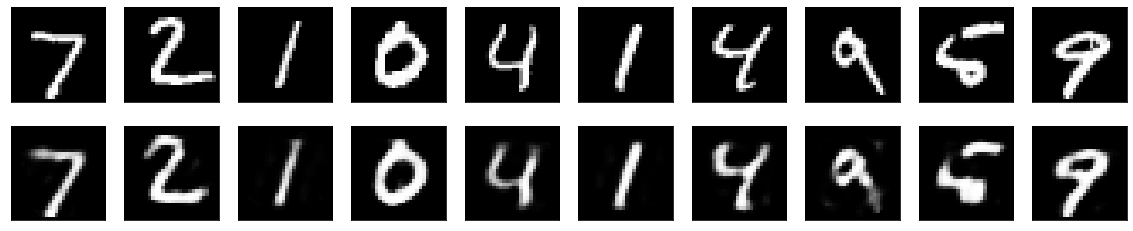

In [ ]:
n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 데이터
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성된 데이터
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()